In [1]:
import uproot as up 
import numpy as np
import pandas as pd
import awkward as ak
from matplotlib.colors import LogNorm
from matplotlib.pylab import figure, cm
import math
import matplotlib.pyplot as plt

print(' uproot version: ', up.__version__)


 uproot version:  5.3.10


In [2]:
file = up.open("qt_ntuple.root")
events = file["Jet_Tree"]
print('Number of Branches inside Jet_Tree = ', len(events.keys()))
events.keys()


Number of Branches inside Jet_Tree =  12


['jet_pt',
 'jet_px',
 'jet_py',
 'jet_pz',
 'jet_E',
 'jet_eta',
 'jet_phi',
 'jet_mass',
 'jet_nConstituents',
 'jet_PartonTruthLabelID',
 'Jet_LeadingCluster2ndLambda',
 'Jet_LeadingCluster2ndR']

In [6]:
df = events.arrays(library="pd") #pip install awkward-pandas
df = df.drop(['jet_pt', 'jet_nConstituents', 'Jet_LeadingCluster2ndLambda', 'Jet_LeadingCluster2ndR'], axis=1)
df.head()


,jet_px,jet_py,jet_pz,jet_E,jet_eta,jet_phi,jet_mass,jet_PartonTruthLabelID
0,"[-68377.15625, 45101.6953125, -31974.462890625...","[-17300.8828125, 16765.513671875, -8439.139648...","[-2230010.25, -333780.34375, -268698.59375, 33...","[2231159.75, 337257.15625, 270747.90625, 33504...","[-4.147092819213867, -2.635150194168091, -2.79...","[-2.8937723636627197, 0.35589802265167236, -2....","[12364.1494140625, 4221.23291015625, 3450.9887...","[1, 5, 5, 2]"
1,"[-2418.339111328125, 52954.58984375, -14759.84...","[-55494.6875, 9181.2314453125, 35037.57421875,...","[-91894.1796875, 78198.7734375, 20848.109375, ...","[107524.8046875, 94994.3984375, 43397.46484375...","[-1.2774360179901123, 1.1695435047149658, 0.52...","[-1.6143466234207153, 0.1716727316379547, 1.96...","[5615.666015625, 4516.9921875, 1792.0845947265...","[5, -1, -1, 1, -1, 5, 5]"
2,"[-49000.22265625, 5477.29931640625, 29219.8222...","[-36279.8046875, 57656.8515625, -42120.0664062...","[260263.703125, -3650.705810546875, 23930.6875...","[267403.0625, 58153.546875, 56921.72265625, 46...","[2.157918691635132, -0.06299235671758652, 0.45...","[-2.504263401031494, 1.4760823249816895, -0.96...","[7068.25439453125, 3767.4853515625, 6285.42919...","[2, 5, 5, -1, -1, 21, -1, 5, 21]"
3,"[-40327.8984375, 119019.4921875, 9697.29003906...","[-183415.03125, 15498.2119140625, 59768.253906...","[-439809.59375, 40459.3828125, 21065.5234375, ...","[478757.6875, 126674.4453125, 64111.0703125, 4...","[-1.5868785381317139, 0.33101511001586914, 0.3...","[-1.7872248888015747, 0.12948715686798096, 1.4...","[22561.6953125, 1902.77294921875, 437.24783325...","[5, -1, 21, 3, -1, 5]"
4,"[43445.55859375, -34037.9453125, -878.71649169...","[-61507.96875, -26249.99609375, 25968.890625, ...","[236901.953125, -178895.453125, 9153.083984375...","[248661.25, 184131.609375, 27559.1796875, 2164...","[1.8636093139648438, -2.1332457065582275, 0.34...","[-0.9558277726173401, -2.4846622943878174, 1.6...","[6256.10107421875, 7295.39208984375, 757.58056...","[5, 1, 21, 1, 5, 5, -1, 2]"


In [7]:
def flatten_awkward_array(row):
    return pd.Series({col: list(row[col]) for col in row.index})


In [8]:
#Flatten the dataframe, so now you have a dataframe of jets instead of dataframe of events
df_flat = df.apply(flatten_awkward_array, axis=1).explode(list(df.columns)).reset_index(drop=True)


In [10]:
bjets       = df_flat [ df_flat["jet_PartonTruthLabelID"] == 5]
failed_jets = df_flat [ df_flat["jet_PartonTruthLabelID"] == -1]
light_jets = df_flat[ (df_flat["jet_PartonTruthLabelID"] != 5) & (df_flat["jet_PartonTruthLabelID"] != -1)]



In [11]:
print("# of bjets:       ", len(bjets))
print("# of light jets:  ", len(light_jets))
print("# of failed jets: ", len(failed_jets))


# of bjets:        2509
# of light jets:   2413
# of failed jets:  1701


In [12]:
print("% of bjets:       ", round( len(bjets)/len(df_flat), 3 ) )
print("% of light jets:  ", round( len(light_jets)/len(df_flat), 3 ) )
print("% of failed jets: ", round( len(failed_jets)/len(df_flat), 3 ) )


% of bjets:        0.379
% of light jets:   0.364
% of failed jets:  0.257


Text(0.5, 0, 'phi')

/lustre/work/client/users/msaadawy/.conda/envs/myROOT/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Arial.
  func(*args, **kwargs)
/lustre/work/client/users/msaadawy/.conda/envs/myROOT/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


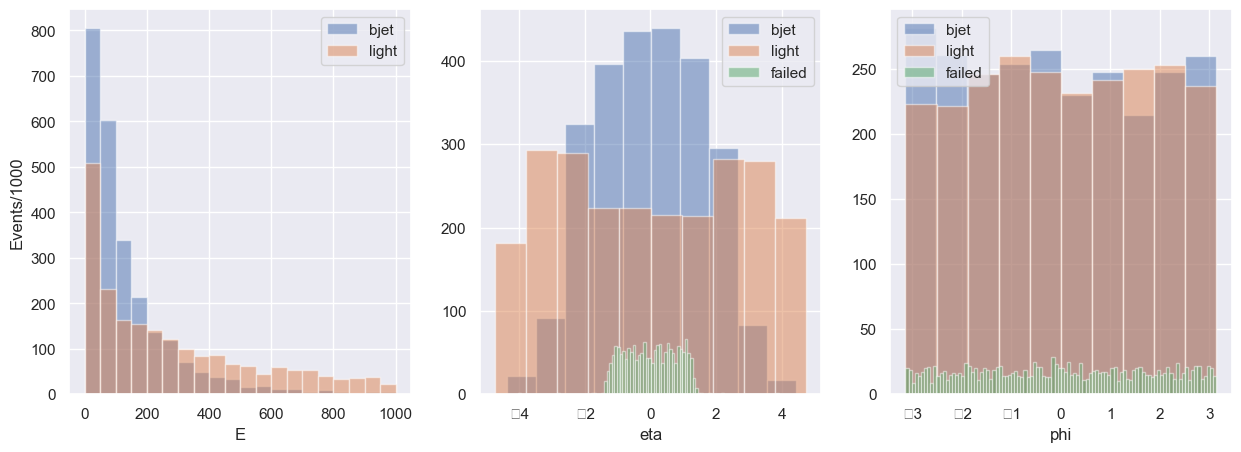

In [275]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(bjets['jet_E']/1e3,bins=20,alpha=0.5,label='bjet', range=(0, 1000))
plt.hist(light_jets['jet_E']/1e3,bins=20,alpha=0.5,label='light', range=(0, 1000))


plt.legend()
plt.xlabel('E')
plt.ylabel('Events/1000')

plt.subplot(132)
plt.hist(bjets['jet_eta'],alpha=0.5,label='bjet')
plt.hist(light_jets['jet_eta'],alpha=0.5,label='light')


plt.hist(failed_jets['jet_eta'],bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('eta')

plt.subplot(133)
plt.hist(bjets['jet_phi'],alpha=0.5,label='bjet')
plt.hist(light_jets['jet_phi'],alpha=0.5,label='light')
plt.hist(failed_jets['jet_phi'],bins=100,alpha=0.5,label='failed')


#plt.xlim(-2, 22)
plt.legend()
plt.xlabel('phi')


Text(0.5, 0, 'phi')

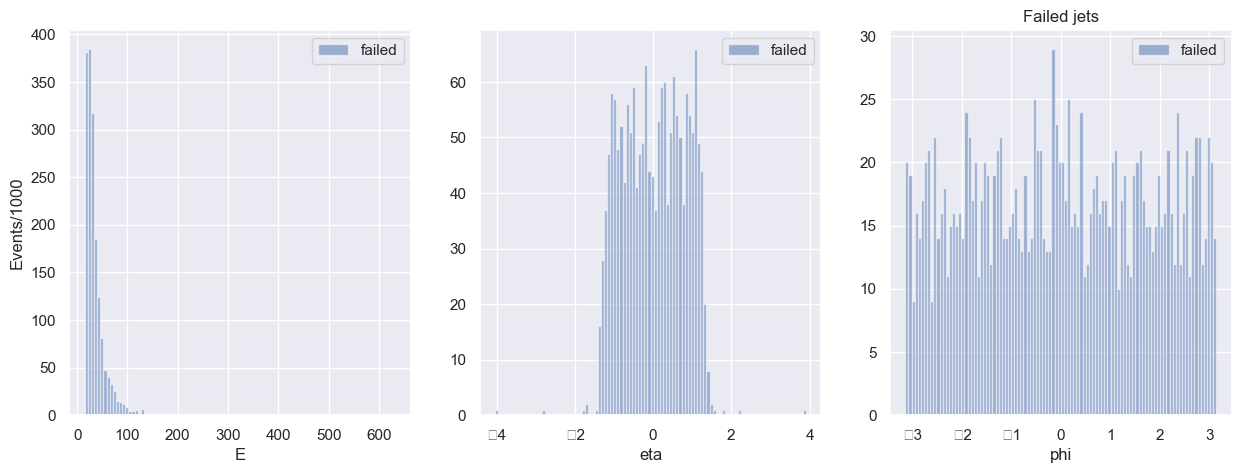

In [187]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(failed_jets['jet_E']/1e3,bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('E')
plt.ylabel('Events/1000')

plt.subplot(132)
plt.hist(failed_jets['jet_eta'],bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('eta')

plt.subplot(133)
plt.hist(failed_jets['jet_phi'],bins=100,alpha=0.5,label='failed')

plt.title("Failed jets")
plt.legend()
plt.xlabel('phi')


Text(0.5, 0, 'jetConstituents')

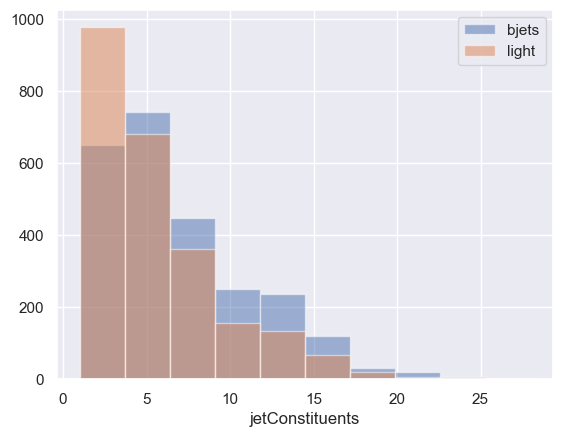

In [188]:
plt.hist(bjets['jet_nConstituents'],bins=10,alpha=0.5,label='bjets')
plt.hist(light_jets['jet_nConstituents'],bins=10,alpha=0.5,label='light')

plt.legend()
plt.xlabel('jetConstituents')


/lustre/work/client/users/msaadawy/.conda/envs/myROOT/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


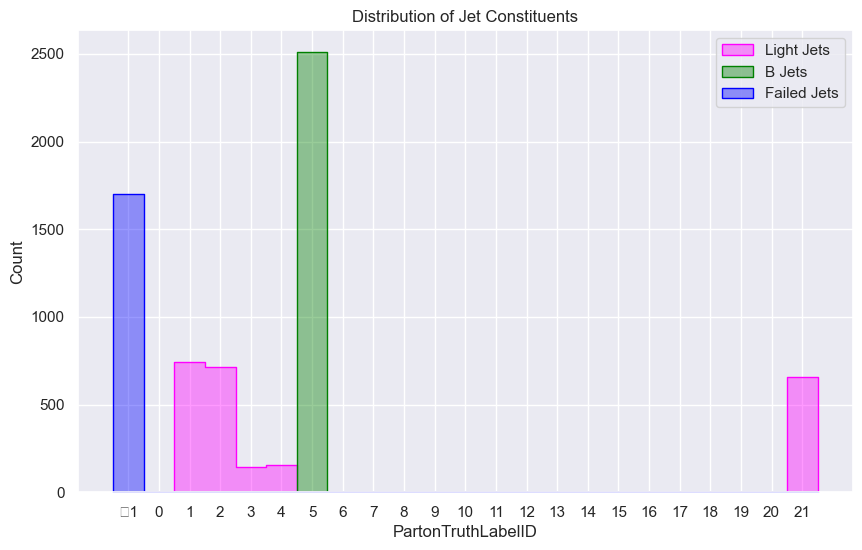

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the maximum value of PartonTruthLabelID in the datasets
max_val = max(light_jets['jet_PartonTruthLabelID'].max(), bjets['jet_PartonTruthLabelID'].max(), failed_jets['jet_PartonTruthLabelID'].max())
bins = np.arange(-1, max_val + 1.5) - 0.5
# Plotting the histograms
plt.figure(figsize=(10, 6))

sns.histplot(light_jets['jet_PartonTruthLabelID'], color='magenta', label='Light Jets', stat="count", alpha=0.4, element= "step", bins = bins)
sns.histplot(bjets['jet_PartonTruthLabelID'], color='green', label='B Jets', stat="count", alpha=0.4, element= "step", bins = bins)
sns.histplot(failed_jets['jet_PartonTruthLabelID'], color='blue', label='Failed Jets', stat="count", alpha=0.4, element= "step", bins = bins)

plt.xticks(np.arange(-1, max_val + 1, 1))
plt.title('Distribution of Jet Constituents')
plt.xlabel('PartonTruthLabelID')
plt.ylabel('Count')
plt.legend()
plt.show()


In [13]:
file = up.open("cluster_info_phiExtended.root")
events = file["Jet_Tree"]
print('Number of Branches inside Jet_Tree = ', len(events.keys()))
events.keys()


Number of Branches inside Jet_Tree =  4


['clus_E', 'clus_Et', 'clus_eta', 'clus_phi']

In [14]:
df_clusters = events.arrays(library="pd") #pip install awkward-pandas
# df_clusters


In [192]:
# # Initialize the "jet_nClusters" column with empty lists
# df_clusters['jet_nClusters'] = [[] for _ in range(len(df_clusters))]

# for k in range(len(df_clusters)):
#     nClus_arr = np.array( [ len(i) for i in df_clusters.iloc[k]["clus_Et"] ] )
#     df_clusters.at[k, "jet_nClusters"] = nClus_arr

# df_clusters.head()


In [15]:
for key in df_clusters.keys():
    df[key] = df_clusters[key]
    df_flat = df.apply(flatten_awkward_array, axis=1).explode(list(df.columns)).reset_index(drop=True)

df_flat.head()


,jet_px,jet_py,jet_pz,jet_E,jet_eta,jet_phi,jet_mass,jet_PartonTruthLabelID,clus_E,clus_Et,clus_eta,clus_phi
0,-68377.15625,-17300.882812,-2230010.25,2231159.75,-4.147093,-2.893772,12364.149414,1.0,"[1391252.875, 1105804.75]","[46472.0, 33869.30859375]","[-4.091978073120117, -4.178731918334961]","[-3.041106939315796, -2.6957662105560303]"
1,45101.695312,16765.513672,-333780.34375,337257.15625,-2.63515,0.355898,4221.23291,5.0,"[275179.84375, 93191.2734375, 32546.693359375,...","[38744.078125, 13053.7509765625, 5635.11621093...","[-2.6486010551452637, -2.6537840366363525, -2....","[0.3379049301147461, 0.4096496105194092, 0.388..."
2,-31974.462891,-8439.139648,-268698.59375,270747.90625,-2.791894,-2.883543,3450.98877,5.0,"[206833.578125, 125238.234375, 11658.658203125]","[25725.703125, 15238.005859375, 1112.182006835...","[-2.7736809253692627, -2.7958505153656006, -3....","[-2.942595958709717, -2.7456564903259277, 3.11..."
3,8889.208008,-13192.658203,334666.15625,335048.1875,3.740023,-0.977872,1665.597168,2.0,"[347313.25, 33947.49609375, 8987.7666015625]","[16041.6357421875, 2181.275146484375, 508.5821...","[3.767652988433838, 3.437018871307373, 3.56433...","[-0.9725562930107117, -1.0684860944747925, -0...."
4,-2418.339111,-55494.6875,-91894.179688,107524.804688,-1.277436,-1.614347,5615.666016,5.0,"[68644.03125, 43242.25, 20195.65625, 2487.9309...","[37254.1484375, 21748.138671875, 9875.78613281...","[-1.2208912372589111, -1.310187816619873, -1.3...","[-1.672230839729309, -1.5038944482803345, -1.6..."


In [16]:
# Initialize the "jet_nClusters" column with empty lists
df_flat['jet_nClusters'] = [[] for _ in range(len(df_flat))]

for k in range(len(df_flat)):
    df_flat.at[k, "jet_nClusters"] = len(df_flat.iloc[k]["clus_eta"])

df_flat.head()


,jet_px,jet_py,jet_pz,jet_E,jet_eta,jet_phi,jet_mass,jet_PartonTruthLabelID,clus_E,clus_Et,clus_eta,clus_phi,jet_nClusters
0,-68377.15625,-17300.882812,-2230010.25,2231159.75,-4.147093,-2.893772,12364.149414,1.0,"[1391252.875, 1105804.75]","[46472.0, 33869.30859375]","[-4.091978073120117, -4.178731918334961]","[-3.041106939315796, -2.6957662105560303]",2
1,45101.695312,16765.513672,-333780.34375,337257.15625,-2.63515,0.355898,4221.23291,5.0,"[275179.84375, 93191.2734375, 32546.693359375,...","[38744.078125, 13053.7509765625, 5635.11621093...","[-2.6486010551452637, -2.6537840366363525, -2....","[0.3379049301147461, 0.4096496105194092, 0.388...",6
2,-31974.462891,-8439.139648,-268698.59375,270747.90625,-2.791894,-2.883543,3450.98877,5.0,"[206833.578125, 125238.234375, 11658.658203125]","[25725.703125, 15238.005859375, 1112.182006835...","[-2.7736809253692627, -2.7958505153656006, -3....","[-2.942595958709717, -2.7456564903259277, 3.11...",3
3,8889.208008,-13192.658203,334666.15625,335048.1875,3.740023,-0.977872,1665.597168,2.0,"[347313.25, 33947.49609375, 8987.7666015625]","[16041.6357421875, 2181.275146484375, 508.5821...","[3.767652988433838, 3.437018871307373, 3.56433...","[-0.9725562930107117, -1.0684860944747925, -0....",3
4,-2418.339111,-55494.6875,-91894.179688,107524.804688,-1.277436,-1.614347,5615.666016,5.0,"[68644.03125, 43242.25, 20195.65625, 2487.9309...","[37254.1484375, 21748.138671875, 9875.78613281...","[-1.2208912372589111, -1.310187816619873, -1.3...","[-1.672230839729309, -1.5038944482803345, -1.6...",10


In [17]:
bjets = df_flat[df_flat['jet_PartonTruthLabelID']==5]
light_jets = df_flat[ (df_flat["jet_PartonTruthLabelID"] != 5) & (df_flat["jet_PartonTruthLabelID"] != -1)]


In [196]:
bjets.keys()


Index(['jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_E', 'jet_eta', 'jet_phi',
       'jet_mass', 'jet_nConstituents', 'jet_PartonTruthLabelID',
       'Jet_LeadingCluster2ndLambda', 'Jet_LeadingCluster2ndR', 'clus_E',
       'clus_Et', 'clus_eta', 'clus_phi', 'jet_nClusters'],
      dtype='object')

In [18]:
def convert_awkward_to_numpy(df, column_names):
    for column_name in column_names:
        df[column_name] = df[column_name].apply(lambda x: ak.to_numpy(x) if isinstance(x, ak.highlevel.Array) else x)
    return df


In [19]:
columns = ['clus_E', 'clus_phi', 'clus_eta', 'clus_Et']
bjets = convert_awkward_to_numpy(bjets.copy(), columns)


In [20]:
columns = ['clus_E', 'clus_phi', 'clus_eta', 'clus_Et']
light_jets = convert_awkward_to_numpy(light_jets.copy(), columns)


In [21]:
bjets.head()

,jet_px,jet_py,jet_pz,jet_E,jet_eta,jet_phi,jet_mass,jet_PartonTruthLabelID,clus_E,clus_Et,clus_eta,clus_phi,jet_nClusters
1,45101.695312,16765.513672,-333780.34375,337257.15625,-2.63515,0.355898,4221.23291,5.0,"[275179.84375, 93191.2734375, 32546.693359375,...","[38744.078125, 13053.7509765625, 5635.11621093...","[-2.6486010551452637, -2.6537840366363525, -2....","[0.3379049301147461, 0.4096496105194092, 0.388...",6
2,-31974.462891,-8439.139648,-268698.59375,270747.90625,-2.791894,-2.883543,3450.98877,5.0,"[206833.578125, 125238.234375, 11658.658203125]","[25725.703125, 15238.005859375, 1112.182006835...","[-2.7736809253692627, -2.7958505153656006, -3....","[-2.942595958709717, -2.7456564903259277, 3.11...",3
4,-2418.339111,-55494.6875,-91894.179688,107524.804688,-1.277436,-1.614347,5615.666016,5.0,"[68644.03125, 43242.25, 20195.65625, 2487.9309...","[37254.1484375, 21748.138671875, 9875.78613281...","[-1.2208912372589111, -1.310187816619873, -1.3...","[-1.672230839729309, -1.5038944482803345, -1.6...",10
9,5146.401367,16029.869141,25880.021484,30925.765625,1.215226,1.260141,1784.750854,5.0,"[23796.4375, 16316.51953125, 235.0, 499.640533...","[13807.615234375, 8082.04736328125, 144.748474...","[1.1400960683822632, 1.327778697013855, 1.0655...","[1.272484540939331, 1.233418583869934, 1.51939...",5
10,-6921.32666,-13629.461914,-87327.46875,88699.265625,-2.443437,-2.040681,2793.808105,5.0,"[19939.3671875, 25224.33984375, 16816.9140625,...","[3329.357177734375, 3961.141845703125, 3219.71...","[-2.476019859313965, -2.538201332092285, -2.33...","[-2.133840560913086, -1.8031916618347168, -2.2...",11


In [200]:
min_list = []
for idx in range(len(bjets['clus_E'])):
    min_list.append(np.min(bjets.iloc[idx]['clus_E']))
print("Minimum cluster E: ", np.min(min_list))


Minimum cluster E:  0.35652923583984375


In [201]:
min_list = []
for idx in range(len(light_jets['clus_E'])):
    min_list.append(np.min(light_jets.iloc[idx]['clus_E']))
print("Minimum cluster E: ", np.min(min_list))


Minimum cluster E:  0.025137867778539658


In [202]:
def extend_phi(phi, jet_phi):
    """
    If a jet center is close to either 0 or 2*pi, its constituents could be on the other side
    of the periodicity line. This takes care of this problem by remapping phi to be either
    above 2*pi or below zero.
    """
    if abs(jet_phi + np.pi)<1.: # phi close to -pi
        return phi-2*np.pi*int(abs(phi-np.pi) <1-abs(jet_phi + np.pi))
    elif abs(jet_phi - np.pi)<1.: # phi close to pi
        return phi+2*np.pi*int(abs(-phi-np.pi) < 1-abs(jet_phi - np.pi)) 
    else: 
        return phi
    


def translate(jet_eta,jet_phi, arr_clusEta, arr_clusPhi):
    """
    center the image about jet_eta and jet_phi
    """
    tmp_clusEta = arr_clusEta
    tmp_clusPhi = arr_clusPhi

    for i,e in enumerate(arr_clusPhi):
         tmp_clusPhi[i] = extend_phi(tmp_clusPhi[i], jet_phi)

    for i,e in enumerate(arr_clusEta):
        tmp_clusEta[i] = arr_clusEta[i] - jet_eta
        tmp_clusPhi[i] = tmp_clusPhi[i] - jet_phi

    return (tmp_clusEta, tmp_clusPhi)


In [203]:
def pixel_edges(jet_size=0.4, pixel_size=(0.055, 0.055), border_size=0.001):
#def pixel_edges(jet_size=1.0, pixel_size=(0.2, 0.2), border_size=0.5):
#def pixel_edges(jet_size=1.0, pixel_size=(0.1, 0.1), border_size=0.0):
    """Return pixel edges required to contain all clusters.
    border_size is interpreted as a fraction of the jet_size
    """
    im_edge = (1. + border_size) * jet_size
    return (np.arange(-im_edge, im_edge+pixel_size[0], pixel_size[0]), np.arange(-im_edge, im_edge+pixel_size[1], pixel_size[1]))

def createImage(data, edges, cutoff=0.1):
    """Return eta-phi histogram of transverse energy deposits.
    Optionally set all intensities below cutoff to zero.
    """
    image, _, _ = np.histogram2d(
        data[0],data[1],
        bins=(edges[0], edges[1]),
        weights=data[2] * (data[2] > cutoff))
    return image

# def normalize(histo):
#     """
#     Normalize picture in [0,multi] range, with integer steps. E.g. multi=255 for 256 steps.
#     """
#     return (histo/np.max(abs(histo)*255)).astype(int)


In [204]:
pack = zip(
           bjets['jet_E'],
           bjets['jet_eta'],
           bjets['jet_phi'],
           bjets['clus_E'],
           bjets['clus_eta'],
           bjets['clus_phi']
           )    
b_images = []
for i, (jet_E, jet_eta,jet_phi, clus_E, clus_eta, clus_phi) in enumerate(pack):
    
    clus_E   = clus_E / jet_E * 1000 # jet image weights = fraction of jet E in image cell
    
   # Center the image about jet_eta and jet_phi
    clus_eta,clus_phi = translate(jet_eta,jet_phi,clus_eta,clus_phi)
    etaedges,phiedges = pixel_edges()

    img = createImage((clus_eta,clus_phi,clus_E), pixel_edges(), )
    # img = normalize(img)
    b_images.append(img)


In [205]:
num_images = len(b_images)
print(f"There are {num_images} images of shape {b_images[0].shape} in the list.")


There are 2509 images of shape (15, 15) in the list.


In [206]:
np.savez_compressed('bjet_images.npz', b_images)


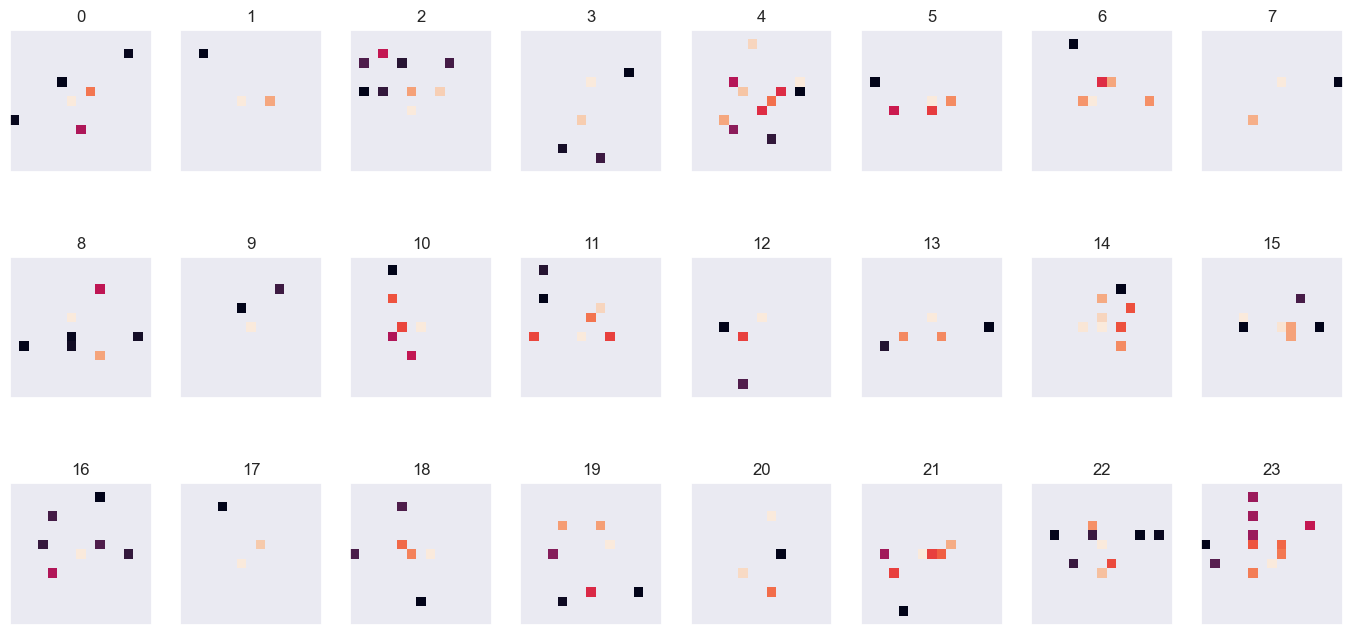

In [207]:
def plot_gallery(images, titles, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1,)
        plt.imshow(images[i], norm=LogNorm())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
plot_gallery(b_images, range(len(b_images)), n_row=3, n_col=8)


In [208]:
pixel_edges()[0]


array([-0.4004, -0.3454, -0.2904, -0.2354, -0.1804, -0.1254, -0.0704,
       -0.0154,  0.0396,  0.0946,  0.1496,  0.2046,  0.2596,  0.3146,
        0.3696,  0.4246])

In [209]:
0.4


0.4

In [210]:
labels = np.arange(-0.3, 0.4, 0.1)
labels = [round(i,2) for i in labels]


In [211]:
labels


[-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3]

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

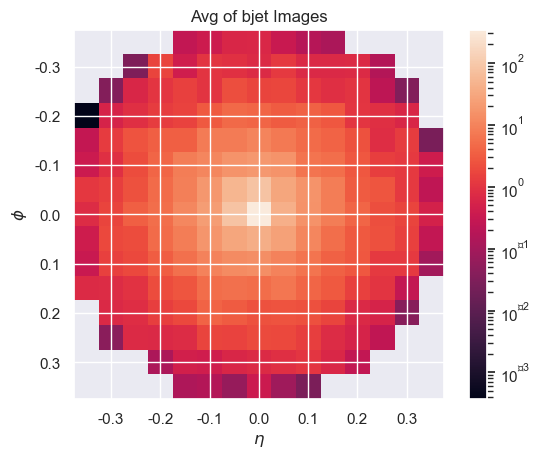

In [212]:
b_avg = sum(b_images)/len(b_images)

import matplotlib.pyplot as plt

# plot the third image in the list
im1=plt.imshow(b_avg, norm=LogNorm())
plt.title("Avg of bjet Images")
# plt.colorbar(im1)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.xticks(ticks=np.arange(1,15,2), labels=labels)
plt.yticks(ticks=np.arange(1,15,2), labels=labels)
plt.colorbar()
plt.show()


In [213]:
pack = zip(
           light_jets['jet_E'],
           light_jets['jet_eta'],
           light_jets['jet_phi'],
           light_jets['clus_E'],
           light_jets['clus_eta'],
           light_jets['clus_phi']
           )    


In [214]:
light_images = []
for i, (jet_E,jet_eta,jet_phi, clus_E, clus_eta, clus_phi) in enumerate(pack):
    
    clus_E   = clus_E / jet_E * 1000 # jet image weights = fraction of jet E in image cell
    
   # Center the image about jet_eta and jet_phi
    clus_eta,clus_phi = translate(jet_eta,jet_phi,clus_eta,clus_phi)
    # etaedges,phiedges = pixel_edges()

    img = createImage((clus_eta,clus_phi,clus_E), pixel_edges(), )
    light_images.append(img)

num_images = len(light_images)
print(f"There are {num_images} images of shape {light_images[0].shape} in the list.")


There are 2413 images of shape (15, 15) in the list.


In [215]:
np.savez_compressed('lightjet_images.npz', light_images)


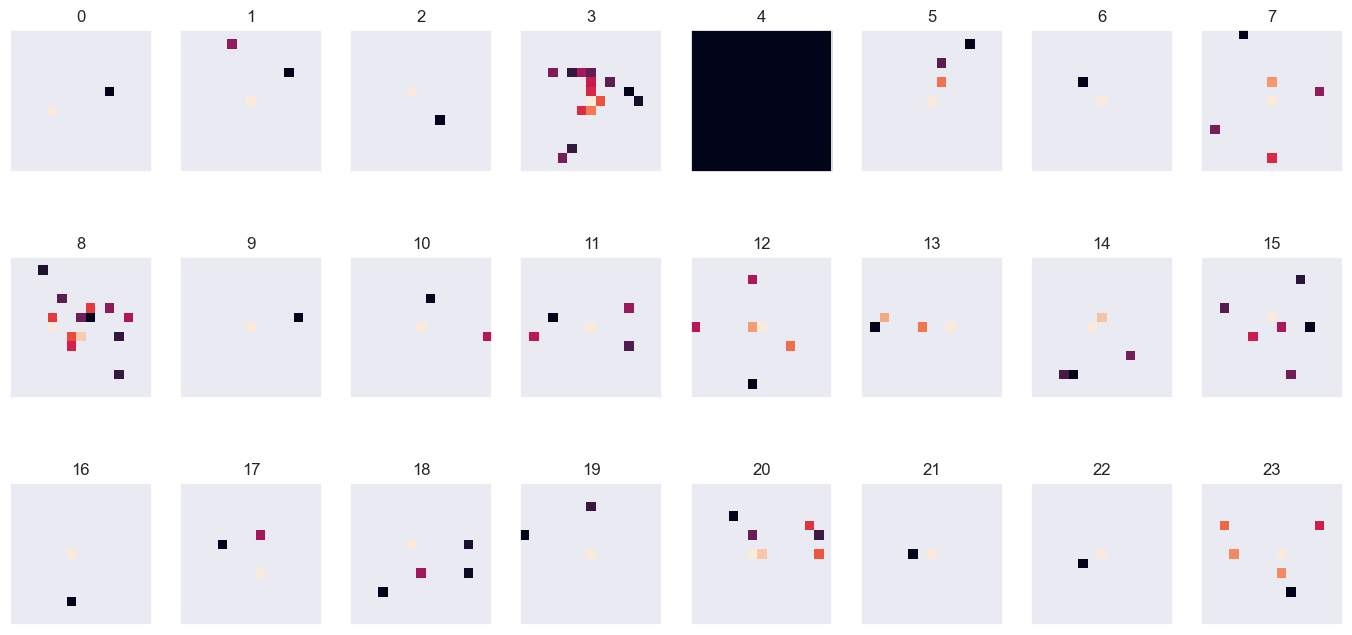

In [216]:
plot_gallery(light_images, range(len(light_images)), n_row=3, n_col=8)


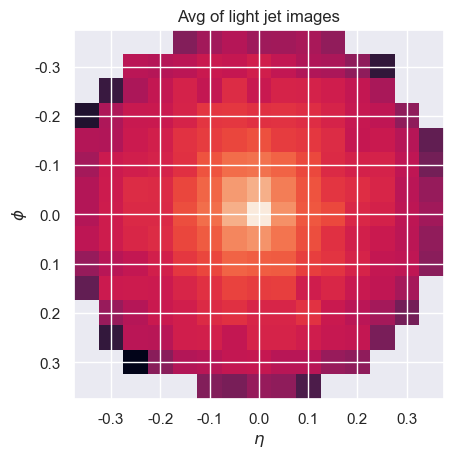

In [217]:
light_avg = sum(light_images)/len(light_images)

labels = np.arange(-0.3, 0.4, 0.1)
labels = [round(i,2) for i in labels]

import matplotlib.pyplot as plt

# plot the third image in the list
im1=plt.imshow(light_avg, norm=LogNorm())
plt.title("Avg of light jet images")
# plt.colorbar(im1)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.xticks(ticks=np.arange(1,15,2), labels=labels)
plt.yticks(ticks=np.arange(1,15,2), labels=labels)
plt.show()


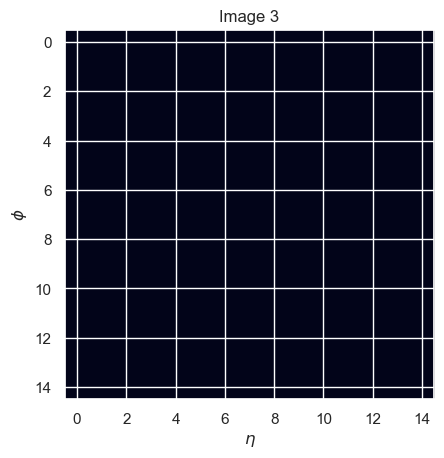

In [218]:
import matplotlib.pyplot as plt

# plot the third image in the list
im1=plt.imshow(light_images[4], norm=LogNorm())
plt.title("Image 3")
# plt.colorbar(im1)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
# plt.xticks()
# show the plot
plt.show()


### Input Variables for BDT Model

$$  \Psi_{R} = \frac{1}{{jetE}} \sum_{\text{clusters}} E_{clus} \cdot \Delta R  $$

where $ \Delta R$  is a calculated between the jet center and the jet constituent

In [37]:
def extend_phi(phi, jet_phi):
    """
    If a jet center is close to either -pi or +pi, its constituents could be on the other side
    of the periodicity line. This takes care of this problem by remapping phi to be either
    above pi or -pi. (remember: phi is between -pi and pi. Check out any histogram)
    """
    if abs(jet_phi + np.pi)<1.: # jet_phi close to -π
        #then subract 2 π from phi but if pi other side of periodicity
        return phi - 2 * np.pi * int(abs(phi-np.pi) <1-abs(jet_phi + np.pi))
    elif abs(jet_phi - np.pi)<1.: # phi close to pi
        return phi+2*np.pi*int(abs(-phi-np.pi) < 1-abs(jet_phi - np.pi)) 
    else: 
        return phi

def deltaR (phi1, phi2, eta1, eta2):
    phi1 = extend_phi(phi1, phi2)
    dphi = np.abs(phi1-phi2)
    if dphi > np.pi:
        dphi = 2 * np.pi - dphi
    return math.sqrt( ( dphi )**2 + ( eta1 - eta2 )**2 )

def psi_R ( jet_E, jet_eta, jet_phi, clus_E, clus_eta, clus_phi ):
    tmp = 0
    for idx in range(len(clus_E)):
        tmp += (1/jet_E) * clus_E[idx] * deltaR(clus_phi[idx], jet_phi, clus_eta[idx], jet_eta)
    return tmp


In [38]:
def dRmax(jet_eta, jet_phi, clus_eta, clus_phi):
    """
    calculate the momentum component of the farthest jet constituent in the jet momentum direction
    """
    li = []
    for idx in range(len(clus_eta)):
        tmp = deltaR(clus_phi[idx], jet_phi, clus_eta[idx], jet_eta)
        li.append(tmp) # make a list of deltaR values

    # arg = np.argmax(li) # get the argument for the farthest jet
    return np.max(li)

In [30]:
dr_list = []
for idx in range(len(bjets)):
    val = dRmax(bjets.iloc[idx]['jet_eta'], bjets.iloc[idx]['jet_phi'], bjets.iloc[idx]['clus_eta'], bjets.iloc[idx]['clus_phi'])
    dr_list.append(val)
    if val>0.4:
        break

In [39]:
bjets['psi_R'] = bjets.copy().apply(lambda row: psi_R(row['jet_E'], row['jet_eta'], row['jet_phi'], row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)
light_jets['psi_R'] = light_jets.copy().apply(lambda row: psi_R(row['jet_E'], row['jet_eta'], row['jet_phi'], row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)


In [40]:
print("for bjets, min: ", np.min(bjets["psi_R"]), "max: ", np.max(bjets["psi_R"]))
print("for light jets, min: ", np.min(light_jets["psi_R"]), "max: ", np.max(light_jets["psi_R"]))


for bjets, min:  0.0 max:  1.0347570943981201
for light jets, min:  0.0 max:  0.9243958114092194


Text(0.5, 0, 'distribution of psi_R')

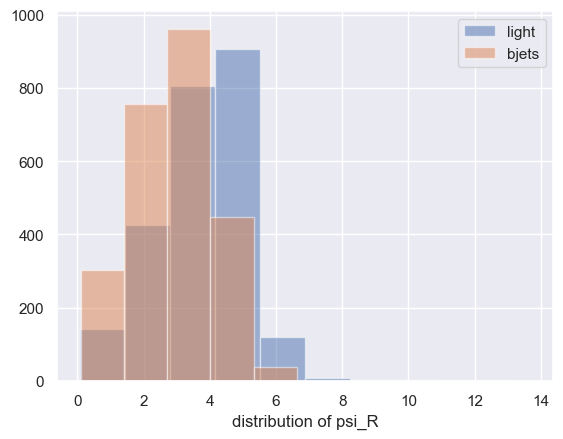

In [223]:
import matplotlib.pyplot as plt

plt.hist(light_jets['psi_R'],bins=10,alpha=0.5,label='light')
plt.hist(bjets['psi_R'],bins=10,alpha=0.5,label='bjets')
plt.legend()
plt.xlabel('distribution of psi_R')


$$  p_{far, \, \hat{j}} = \frac{\vec{p}_{Farthest} \cdot \vec{p}_{jet}} {p_{jet}}   $$

where: $ jet p_x, p_y, p_z$ are easily calculated from the jet TLorentz Vector.

$ \vec{p}_{Farthest} $ is the momentum vector of the farthest jet constituent/
using the assumption that Topoclusters are massless pseudoparticles, and that clus_eta and clus_phi are good enough approximations for the momentum direction relative to the nominal interaction point.

$p_x = E \, sin\theta \, cos\phi$

$p_y = E \, sin\theta \, sin\phi$

where $sin\theta = \frac{2 e^{-\eta}}{1+e^{-2\eta}} $

$p_z = E \, cos\theta$ , where $cos\theta = \frac{1-e^{-2\eta}}{1+e^{-2\eta}}$


In [41]:
def pfar_proj(jet_px, jet_py, jet_pz, jet_eta, jet_phi, clus_E, clus_eta, clus_phi):
    """
    calculate the momentum component of the farthest jet constituent in the jet momentum direction
    """
    li = []
    for idx in range(len(clus_E)):
        tmp = deltaR(clus_phi[idx], jet_phi, clus_eta[idx], jet_eta)
        li.append(tmp) # make a list of deltaR values

    arg = np.argmax(li) # get the argument for the farthest jet 
    pjet = math.sqrt(jet_px**2 + jet_py**2 + jet_pz**2)
    sine = 2 * math.exp(-clus_eta[arg]) / (1 + math.exp(-2 * clus_eta[arg]))
    cosine = (1 - math.exp(-2 * clus_eta[arg])) / (1 + math.exp(-2 * clus_eta[arg]) )

    proj = (1/pjet) * (jet_px * sine * math.cos(clus_phi[arg]) + jet_py * sine * math.sin(clus_phi[arg]) + jet_pz * cosine)

    return abs(proj)
    

In [61]:
def dRmax_E(jet_E, jet_eta, jet_phi, clus_E, clus_eta, clus_phi):
    """
    calculate the momentum component of the farthest jet constituent in the jet momentum direction
    """
    li = []
    for idx in range(len(clus_eta)):
        tmp = deltaR(clus_phi[idx], jet_phi, clus_eta[idx], jet_eta)
        li.append(tmp) # make a list of deltaR values

    arg = np.argmax(li) # get the argument for the farthest jet
    return np.max(li)*clus_E[arg]/jet_E*1000

In [62]:
bjets['pfar_proj'] = bjets.copy().apply( lambda row: pfar_proj( row['jet_px'], row['jet_py'], row['jet_pz'], row['jet_eta'], row['jet_phi'] , row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)
light_jets['pfar_proj'] = light_jets.copy().apply( lambda row: pfar_proj( row['jet_px'], row['jet_py'], row['jet_pz'], row['jet_eta'], row['jet_phi'] , row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)

bjets['dr_max'] = bjets.copy().apply( lambda row: dRmax(row['jet_eta'], row['jet_phi'], row['clus_eta'], row['clus_phi']), axis=1)
light_jets['dr_max'] = light_jets.copy().apply( lambda row: dRmax( row['jet_eta'], row['jet_phi'], row['clus_eta'], row['clus_phi']), axis=1)

bjets['farthest_eFrac'] = bjets.copy().apply( lambda row: dRmax_E(row['jet_E'], row['jet_eta'], row['jet_phi'], row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)
light_jets['farthest_eFrac'] = light_jets.copy().apply( lambda row: dRmax_E(row['jet_E'], row['jet_eta'], row['jet_phi'], row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)

In [63]:
bjets['farthest_eFrac'].describe()


count    2509.000000
mean       18.424060
std        37.500976
min         0.000000
25%         1.440913
50%         5.340935
75%        20.410553
max       667.992622
Name: farthest_eFrac, dtype: float64

Text(0.5, 0, 'distribution of pfar_proj')

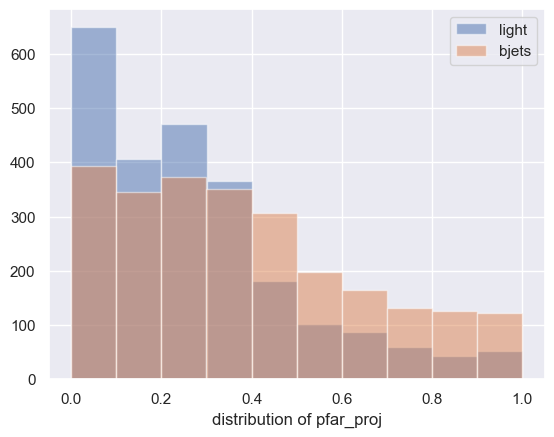

In [247]:
import matplotlib.pyplot as plt

plt.hist(light_jets['pfar_proj'],bins=10,alpha=0.5,label='light')
plt.hist(bjets['pfar_proj'],bins=10,alpha=0.5,label='bjets')
plt.legend()
plt.xlabel('distribution of pfar_proj')


Text(0.5, 0, 'distribution of farthest deltaR')

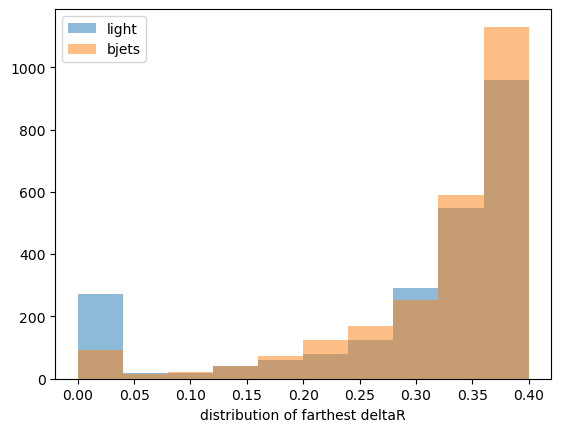

In [44]:
import matplotlib.pyplot as plt

plt.hist(light_jets['dr_max'],bins=10,alpha=0.5,label='light')
plt.hist(bjets['dr_max'],bins=10,alpha=0.5,label='bjets')
plt.legend()
plt.xlabel('distribution of farthest deltaR')


In [46]:
# Function to compute Emax_frac for a given row
def compute_emax_frac(row):
    return np.max(row['clus_E']) / row['jet_E']

# Compute Emax_frac for bjets
bjets['Emax_frac'] = bjets.copy().apply(compute_emax_frac, axis=1)

# Compute Emax_frac for light_jets
light_jets['Emax_frac'] = light_jets.copy().apply(compute_emax_frac, axis=1)


Text(0.5, 0, 'distribution of Emax_frac')

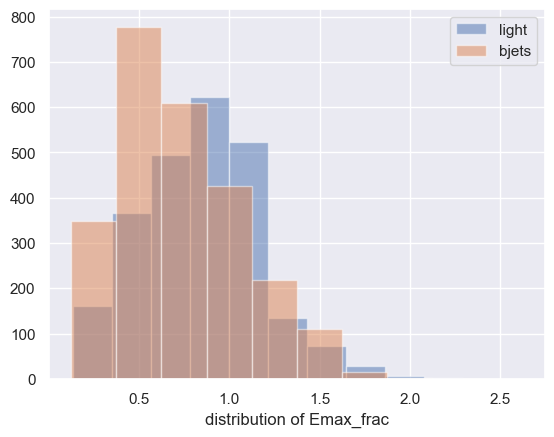

In [47]:
import matplotlib.pyplot as plt

plt.hist(light_jets['Emax_frac'],bins=10,alpha=0.5,label='light')
plt.hist(bjets['Emax_frac'],bins=10,alpha=0.5,label='bjets')
plt.legend()
plt.xlabel('distribution of Emax_frac')


In [64]:
# Create bdt_df by selecting the columns from bjets
bdt_df = bjets[['psi_R', 'pfar_proj', 'Emax_frac', 'dr_max','farthest_eFrac']].copy()
bdt_df['is_bjet'] = 1


# Assign the columns from light_jets to bdt_df
light_jets_df = light_jets[['psi_R', 'pfar_proj', 'Emax_frac', 'dr_max','farthest_eFrac']].copy()
light_jets_df['is_bjet'] = 0

bdt_df = pd.concat([bdt_df, light_jets_df], ignore_index=True)


In [56]:
bdt_df


,psi_R,pfar_proj,Emax_frac,dr_max,farthest_eFrac,is_bjet
0,0.071328,0.998849,0.815935,0.383066,0.007937,1
1,0.127426,0.999156,0.763934,0.381055,0.016409,1
2,0.123481,0.984566,0.638402,0.376930,0.000708,1
3,0.131026,0.985656,0.769470,0.361618,0.005842,1
4,0.294779,0.998798,0.284380,0.333070,0.082685,1
...,...,...,...,...,...,...
4917,0.042807,0.967596,1.267010,0.274712,0.010467,0
4918,0.078472,0.999736,1.080469,0.388409,0.007736,0
4919,0.141830,0.990236,1.047103,0.366299,0.002031,0
4920,0.107176,0.997731,0.467290,0.392512,0.003534,0


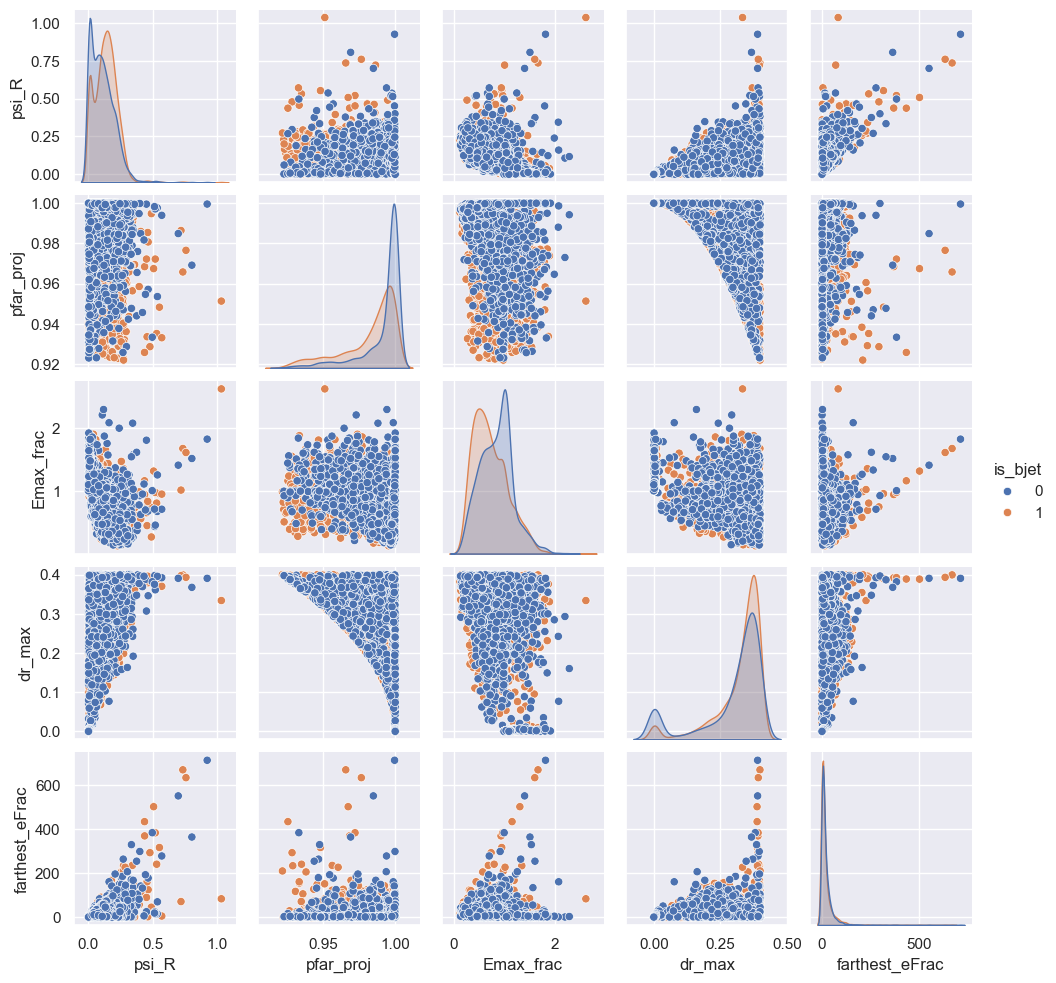

In [65]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
sns.pairplot(bdt_df, hue="is_bjet", height=2)


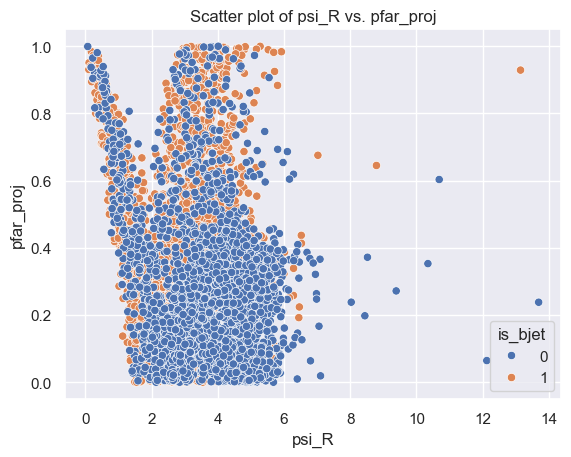

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bdt_df is your DataFrame with 'psi_R', 'pfar_proj', and 'is_bjet' columns

# Create the scatter plot
sns.scatterplot(data=bdt_df, x='psi_R', y='pfar_proj', hue='is_bjet')

# Add labels and title if necessary
plt.xlabel('psi_R')
plt.ylabel('pfar_proj')
plt.title('Scatter plot of psi_R vs. pfar_proj')

# Show the plot
plt.show()


In [236]:
bdt_df.head()


,psi_R,pfar_proj,Emax_frac,dr_max,is_bjet
0,3.320167,0.020212,0.815935,2.853842,1
1,5.101854,0.117343,0.763934,4.111161,1
2,2.602255,0.051290,0.638402,2.127010,1
3,2.328666,0.109739,0.769470,1.794998,1
4,4.727653,0.330697,0.284380,3.419343,1


In [66]:
import xgboost as xgb

#Split the samples into test and train.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import dump_svmlight_file
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score



In [238]:
X_train,X_test,y_train,y_test = train_test_split(bdt_df[['psi_R', 'pfar_proj', 'Emax_frac', 'dr_max','farthest_eFrac']],bdt_df['is_bjet'],test_size=0.1,random_state=0)
x = X_train[['psi_R', 'pfar_proj', 'Emax_frac', 'dr_max','farthest_eFrac']].copy().to_numpy()
y = y_train.copy().to_numpy()
x_test = X_test.copy().to_numpy()
y_test = y_test.copy().to_numpy()


In [89]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

# Define the model with L2 regularization
clf2 = xgb.XGBClassifier(objective='binary:logistic' ,use_label_encoder=False, reg_lambda=1)

# Hyperparameter grid for tuning
param_grid = {
    'eval_metric': ['rmse'],
    'n_estimators': [50, 100, 200, 300, 400, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1, 1.5, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf2, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_search.fit(x, y)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the final model with the best parameters
best_params = grid_search.best_params_
best_params['n_estimators'] = 1000  # Increase n_estimators for final training
clf2 = xgb.XGBClassifier(**best_params, objective='binary:logistic', use_label_encoder=False)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
Best parameters: {'colsample_bytree': 1.0, 'eval_metric': 'rmse', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 1.0}
Best cross-validation score: 0.6121362592911281


In [90]:
# Use early stopping to prevent overfitting
eval_set = [(x, y), (x_test, y_test)]
clf2.fit(x, y, eval_set=eval_set, early_stopping_rounds=5, verbose=0)

/lustre/work/client/users/msaadawy/.conda/envs/myROOT/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Validation accuracy: 0.5699797160243407


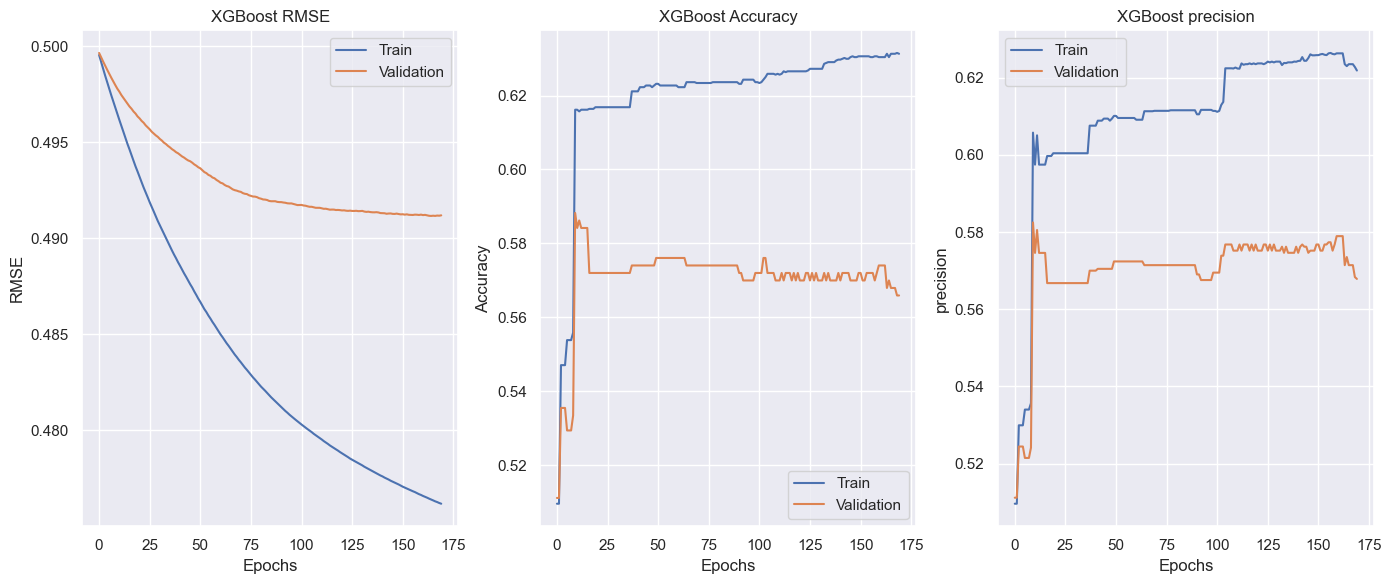

In [91]:
from sklearn import metrics as mt
from sklearn.metrics import recall_score, precision_score
# Evaluate the model
y_pred = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Validation accuracy:", accuracy)

# Plot training and validation loss and accuracy over epochs
results = clf2.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# Plot log loss
ax1.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax1.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('RMSE')
ax1.set_title('XGBoost RMSE')

# Calculate accuracy for each epoch
train_accuracy = [accuracy_score(y_train, clf2.predict(X_train, iteration_range=(0, i+1))) for i in x_axis]
val_accuracy = [accuracy_score(y_test, clf2.predict(X_test, iteration_range=(0, i+1))) for i in x_axis]

# Plot accuracy
ax2.plot(x_axis, train_accuracy, label='Train')
ax2.plot(x_axis, val_accuracy, label='Validation')
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('XGBoost Accuracy')

# Calculate recall for each epoch
train_precision = [precision_score(y_train, clf2.predict(X_train, iteration_range=(0, i+1))) for i in x_axis]
val_precision = [precision_score(y_test, clf2.predict(X_test, iteration_range=(0, i+1))) for i in x_axis]

# Plot recall
ax3.plot(x_axis, train_precision, label='Train')
ax3.plot(x_axis, val_precision, label='Validation')
ax3.legend()
ax3.set_xlabel('Epochs')
ax3.set_ylabel('precision')
ax3.set_title('XGBoost precision')

plt.tight_layout()
plt.show()

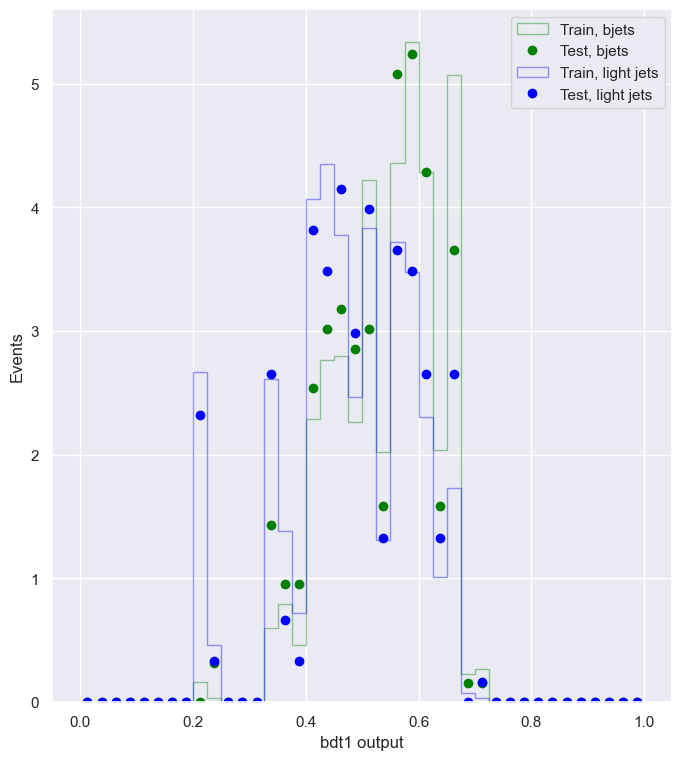

In [92]:
import matplotlib.pyplot as plt

y_pred_b_train = clf2.predict_proba(X_train[y_train==1])
y_pred_b_test = clf2.predict_proba(X_test[y_test==1])

y_pred_light_train = clf2.predict_proba(X_train[y_train==0])
y_pred_light_test = clf2.predict_proba(X_test[y_test==0])


n_bins=40
hist_range=(0,1.0)
plt.figure(figsize=(8,9))

plt.hist(y_pred_b_train[:,1] ,bins=n_bins,range=hist_range,histtype='step' , color="green",density=True,alpha=0.4,label="Train, bjets")
counts,bin_edges = np.histogram(y_pred_b_test[:,1], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, bjets")

plt.hist(y_pred_light_train[:,1],bins=n_bins,range=hist_range,histtype='step',density=True,alpha=0.4,color="blue",label="Train, light jets")
counts,bin_edges = np.histogram(y_pred_light_test[:,1],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="blue",label="Test, light jets")

plt.xlabel("Prediction from bdt1", fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.legend()
plt.xlabel('bdt1 output')
plt.show()


In [75]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
ylabel=['light-jet', 'b-jet']
xlabel=['predicted light-jet','predicted b-jet']
def summarize_net(net, x_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    
    yhat = net.predict(x_test)
    # yhat = (yhat>0.5).astype(int)
    acc = mt.precision_score(y_test,yhat.squeeze())
    cm = mt.confusion_matrix(y_test,yhat.squeeze())
    # cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, fmt='.2f', annot=True ,xticklabels=xlabel,yticklabels=ylabel)
    plt.title(f'{title_text} {acc:.4f}')

In [ ]:
pred = clf2.predict(X_train)
bcount = 0
lcount = 0
for i in range(len(y_train)):
    if y_train.iloc[i] == 0:
        if pred[i] == 0:
            lcount += 1
        
print(lcount)

1264


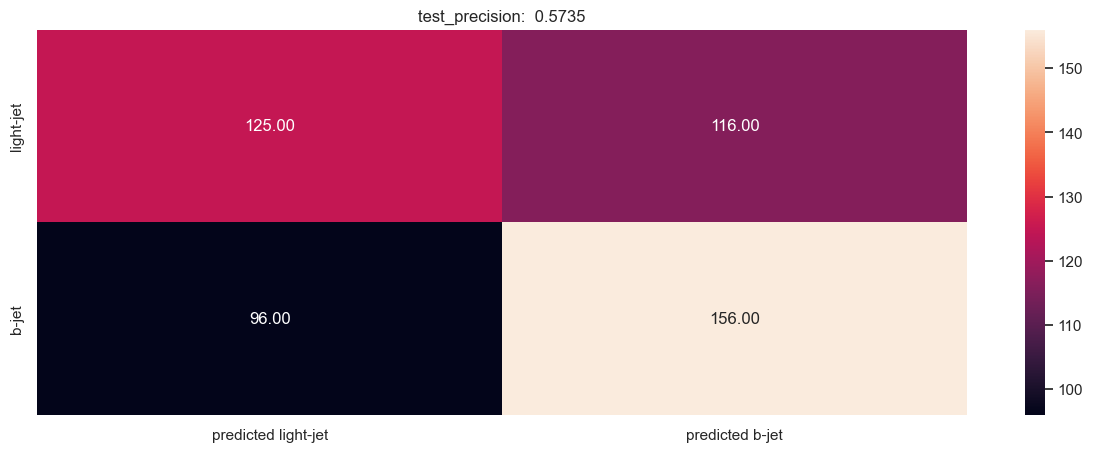

In [94]:
summarize_net(clf2, X_test, y_test, "test_precision: ")

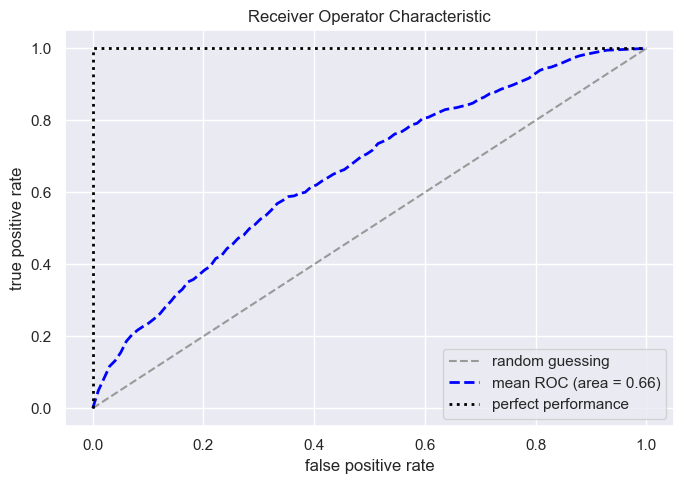

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, precision_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_idx, test_idx) in enumerate(ss.split(y)):
    eval_set = [(x_test, y_test)]
    bdt1 = xgb.XGBClassifier(**best_params, objective='binary:logistic', use_label_encoder=False, early_stopping_rounds=5)
    probas = bdt1.fit(x[train_idx], y[train_idx], eval_set=eval_set, verbose=0).predict_proba(x[test_idx])

    fpr, tpr, thresholds = roc_curve(y[test_idx], probas[:,1], pos_label=1)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    # plt.plot(fpr, tpr, lw=1,
    #             label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1],
        linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
    

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, '--', color='blue',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], [0, 1, 1], lw=2,
         linestyle=':', color='black',
         label='perfect performance')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")


plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()


In [96]:
X_train,X_test,y_train,y_test = train_test_split(bdt_df[['psi_R', 'Emax_frac']],bdt_df['is_bjet'],test_size=0.1,random_state=0)
x = X_train[["psi_R","Emax_frac"]].copy().to_numpy()
y = y_train.copy().to_numpy()
x_test = X_test.copy().to_numpy()
y_test = y_test.copy().to_numpy()

In [98]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

# Define the model with L2 regularization
bdt13 = xgb.XGBClassifier(objective='binary:logistic' ,use_label_encoder=False, reg_lambda=1)

# Hyperparameter grid for tuning
param_grid = {
    'eval_metric': ['rmse'],
    'n_estimators': [50, 100, 200, 300, 400, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1, 1.5, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(bdt13, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_search.fit(x, y)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the final model with the best parameters
best_params = grid_search.best_params_
best_params['n_estimators'] = 1000  # Increase n_estimators for final training
bdt13 = xgb.XGBClassifier(**best_params, objective='binary:logistic', use_label_encoder=False, early_stopping_rounds=5)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


Best parameters: {'colsample_bytree': 1.0, 'eval_metric': 'rmse', 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 2, 'subsample': 1.0}
Best cross-validation score: 0.6131597505301243


In [99]:
eval_set = [(x, y), (x_test, y_test)]
bdt13.fit(x, y, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:0.49940	validation_1-rmse:0.49960
[1]	validation_0-rmse:0.49891	validation_1-rmse:0.49932
[2]	validation_0-rmse:0.49843	validation_1-rmse:0.49905
[3]	validation_0-rmse:0.49795	validation_1-rmse:0.49878
[4]	validation_0-rmse:0.49748	validation_1-rmse:0.49852
[5]	validation_0-rmse:0.49702	validation_1-rmse:0.49826
[6]	validation_0-rmse:0.49657	validation_1-rmse:0.49802
[7]	validation_0-rmse:0.49613	validation_1-rmse:0.49777
[8]	validation_0-rmse:0.49569	validation_1-rmse:0.49754
[9]	validation_0-rmse:0.49526	validation_1-rmse:0.49732
[10]	validation_0-rmse:0.49484	validation_1-rmse:0.49711
[11]	validation_0-rmse:0.49443	validation_1-rmse:0.49689
[12]	validation_0-rmse:0.49402	validation_1-rmse:0.49667
[13]	validation_0-rmse:0.49362	validation_1-rmse:0.49646
[14]	validation_0-rmse:0.49323	validation_1-rmse:0.49628
[15]	validation_0-rmse:0.49284	validation_1-rmse:0.49608
[16]	validation_0-rmse:0.49247	validation_1-rmse:0.49590
[17]	validation_0-rmse:0.49210	validation

[82]	validation_0-rmse:0.47642	validation_1-rmse:0.48997
[83]	validation_0-rmse:0.47628	validation_1-rmse:0.48996
[84]	validation_0-rmse:0.47614	validation_1-rmse:0.48991
[85]	validation_0-rmse:0.47600	validation_1-rmse:0.48991
[86]	validation_0-rmse:0.47587	validation_1-rmse:0.48989
[87]	validation_0-rmse:0.47573	validation_1-rmse:0.48988
[88]	validation_0-rmse:0.47561	validation_1-rmse:0.48986
[89]	validation_0-rmse:0.47547	validation_1-rmse:0.48980
[90]	validation_0-rmse:0.47535	validation_1-rmse:0.48977
[91]	validation_0-rmse:0.47522	validation_1-rmse:0.48976
[92]	validation_0-rmse:0.47509	validation_1-rmse:0.48976
[93]	validation_0-rmse:0.47497	validation_1-rmse:0.48975
[94]	validation_0-rmse:0.47483	validation_1-rmse:0.48973
[95]	validation_0-rmse:0.47472	validation_1-rmse:0.48971
[96]	validation_0-rmse:0.47459	validation_1-rmse:0.48971
[97]	validation_0-rmse:0.47447	validation_1-rmse:0.48968
[98]	validation_0-rmse:0.47437	validation_1-rmse:0.48964
[99]	validation_0-rmse:0.47426	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

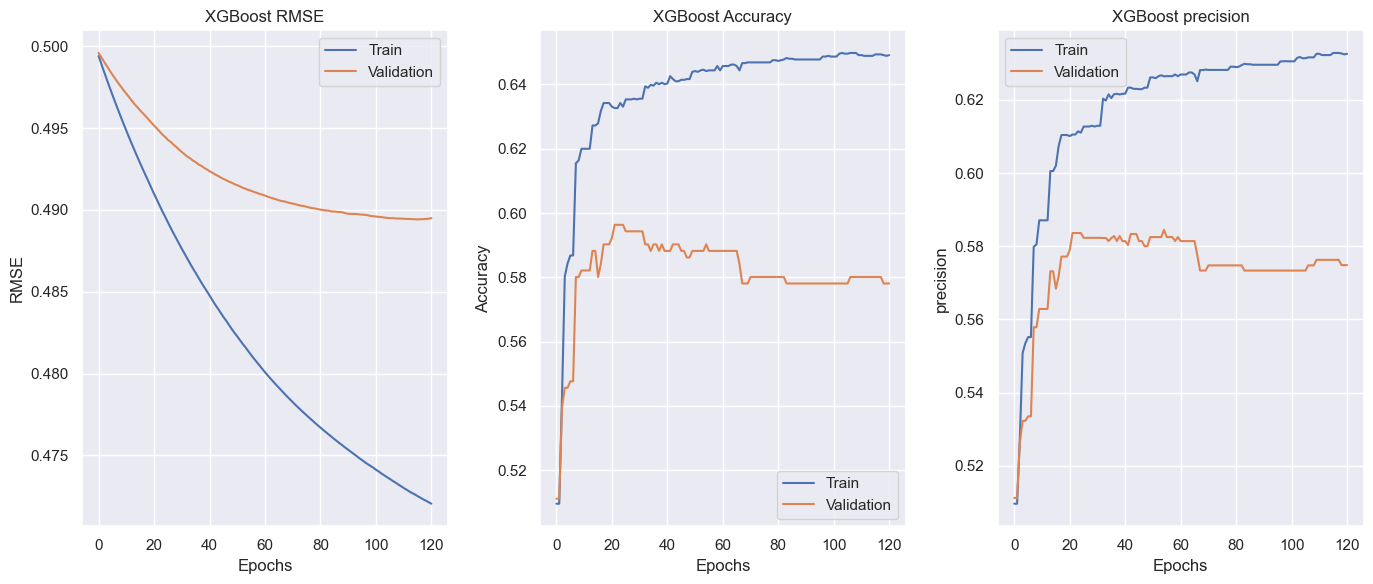

In [100]:
from sklearn import metrics as mt
from sklearn.metrics import recall_score, precision_score
# Evaluate the modelrecall
results = bdt13.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# Plot log loss
ax1.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax1.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('RMSE')
ax1.set_title('XGBoost RMSE')

# Calculate accuracy for each epoch
train_accuracy = [accuracy_score(y_train, bdt13.predict(X_train, iteration_range=(0, i+1))) for i in x_axis]
val_accuracy = [accuracy_score(y_test, bdt13.predict(X_test, iteration_range=(0, i+1))) for i in x_axis]

# Plot accuracy
ax2.plot(x_axis, train_accuracy, label='Train')
ax2.plot(x_axis, val_accuracy, label='Validation')
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('XGBoost Accuracy')

# Calculate recall for each epoch
train_precision = [precision_score(y_train, bdt13.predict(X_train, iteration_range=(0, i+1))) for i in x_axis]
val_precision = [precision_score(y_test, bdt13.predict(X_test, iteration_range=(0, i+1))) for i in x_axis]

# Plot recall
ax3.plot(x_axis, train_precision, label='Train')
ax3.plot(x_axis, val_precision, label='Validation')
ax3.legend()
ax3.set_xlabel('Epochs')
ax3.set_ylabel('precision')
ax3.set_title('XGBoost precision')

plt.tight_layout()
plt.show()

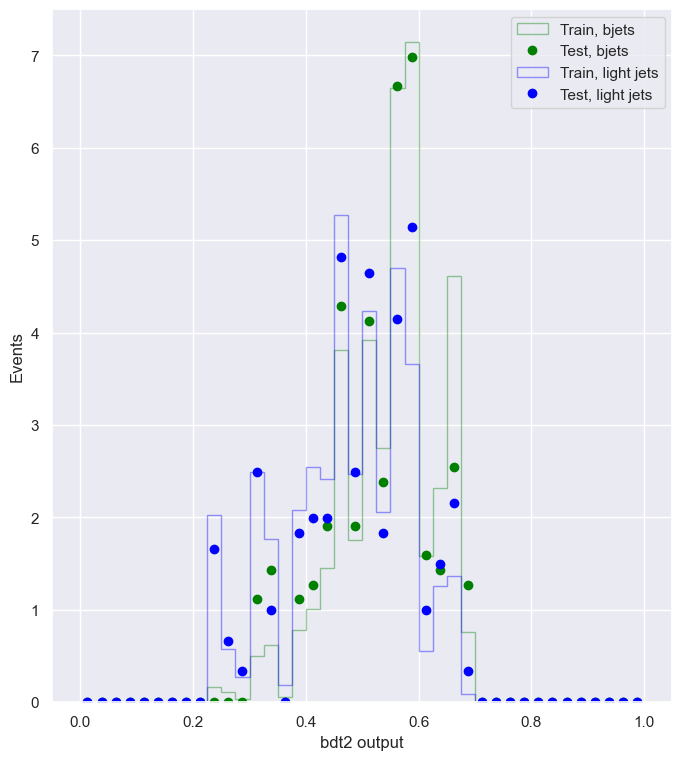

In [101]:
import matplotlib.pyplot as plt

y_pred_b_train = bdt13.predict_proba(X_train[y_train==1])
y_pred_b_test = bdt13.predict_proba(X_test[y_test==1])

y_pred_light_train = bdt13.predict_proba(X_train[y_train==0])
y_pred_light_test = bdt13.predict_proba(X_test[y_test==0])


n_bins=40
hist_range=(0,1.0)
plt.figure(figsize=(8,9))

plt.hist(y_pred_b_train[:,1] ,bins=n_bins,range=hist_range,histtype='step' , color="green",density=True,alpha=0.4,label="Train, bjets")
counts,bin_edges = np.histogram(y_pred_b_test[:,1], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, bjets")

plt.hist(y_pred_light_train[:,1],bins=n_bins,range=hist_range,histtype='step',density=True,alpha=0.4,color="blue",label="Train, light jets")
counts,bin_edges = np.histogram(y_pred_light_test[:,1],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="blue",label="Test, light jets")

plt.xlabel("Prediction from bdt2", fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.legend()
plt.xlabel('bdt2 output')
plt.show()


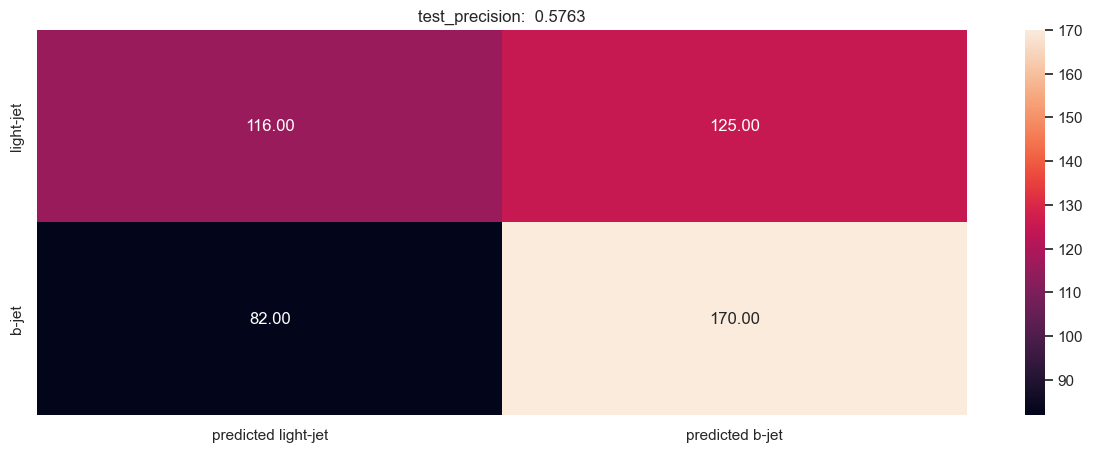

In [102]:
summarize_net(bdt13, x_test, y_test, "test_precision: ")

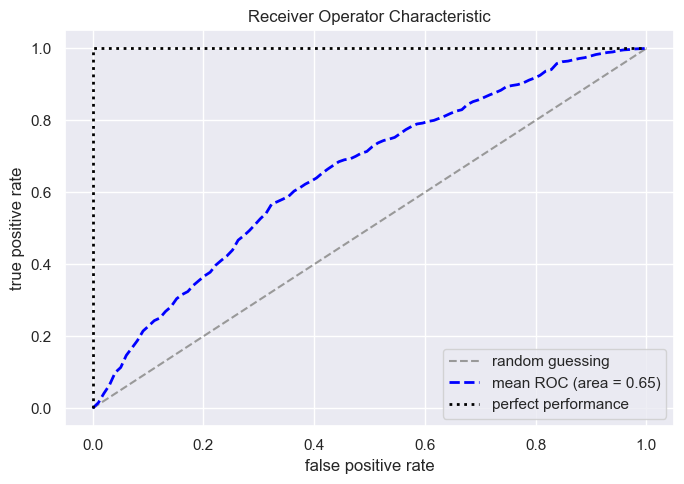

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, precision_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_idx, test_idx) in enumerate(ss.split(y)):
    eval_set = [(x[test_idx], y[test_idx])]
    bdt1 = xgb.XGBClassifier(**best_params, objective='binary:logistic', use_label_encoder=False, early_stopping_rounds=5)
    probas = bdt1.fit(x[train_idx], y[train_idx], eval_set=eval_set, verbose=0).predict_proba(x[test_idx])

    fpr, tpr, thresholds = roc_curve(y[test_idx], probas[:,1], pos_label=1)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    # plt.plot(fpr, tpr, lw=1,
    #             label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1],
        linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
    

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, '--', color='blue',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], [0, 1, 1], lw=2,
         linestyle=':', color='black',
         label='perfect performance')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")


plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()


In [104]:
X_train,X_test,y_train,y_test = train_test_split(bdt_df[['psi_R', 'Emax_frac', 'dr_max']],bdt_df['is_bjet'],test_size=0.1,random_state=0)
x = X_train.copy().to_numpy()
y = y_train.copy().to_numpy()
x_test = X_test.copy().to_numpy()
y_test = y_test.copy().to_numpy()

In [105]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

# Define the model with L2 regularization
bdt134 = xgb.XGBClassifier(objective='binary:logistic' ,use_label_encoder=False, reg_lambda=1)

# Hyperparameter grid for tuning
param_grid = {
    'eval_metric': ['rmse', 'logloss', 'auc', 'interval-regression-accuracy', 'poisson-nloglik'],
    'n_estimators': [50, 100, 200, 300, 400, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1, 1.5, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(bdt134, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search.fit(x, y)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the final model with the best parameters
best_params = grid_search.best_params_
best_params['n_estimators'] = 1000  # Increase n_estimators for final training
bdt134 = xgb.XGBClassifier(**best_params, objective='binary:logistic', use_label_encoder=False, early_stopping_rounds=5)


Fitting 5 folds for each of 25920 candidates, totalling 129600 fits


Best parameters: {'colsample_bytree': 1.0, 'eval_metric': 'rmse', 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 1.0}
Best cross-validation score: 0.7173390498989463


In [83]:
eval_set = [(x, y), (x_test, y_test)]
bdt134.fit(x, y, eval_set=eval_set, verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

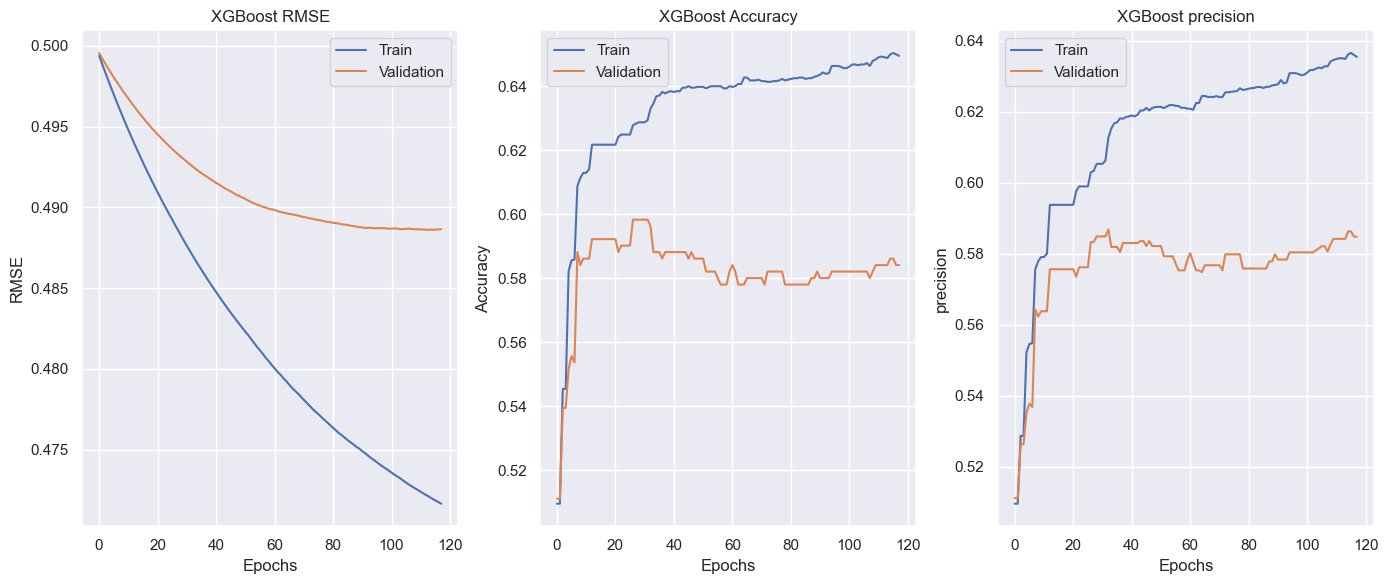

In [84]:
from sklearn import metrics as mt
from sklearn.metrics import recall_score, precision_score
# Evaluate the modelrecall
results = bdt134.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# Plot log loss
ax1.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax1.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('RMSE')
ax1.set_title('XGBoost RMSE')

# Calculate accuracy for each epoch
train_accuracy = [accuracy_score(y_train, bdt134.predict(X_train, iteration_range=(0, i+1))) for i in x_axis]
val_accuracy = [accuracy_score(y_test, bdt134.predict(X_test, iteration_range=(0, i+1))) for i in x_axis]

# Plot accuracy
ax2.plot(x_axis, train_accuracy, label='Train')
ax2.plot(x_axis, val_accuracy, label='Validation')
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('XGBoost Accuracy')

# Calculate recall for each epoch
train_precision = [precision_score(y_train, bdt134.predict(X_train, iteration_range=(0, i+1))) for i in x_axis]
val_precision = [precision_score(y_test, bdt134.predict(X_test, iteration_range=(0, i+1))) for i in x_axis]

# Plot recall
ax3.plot(x_axis, train_precision, label='Train')
ax3.plot(x_axis, val_precision, label='Validation')
ax3.legend()
ax3.set_xlabel('Epochs')
ax3.set_ylabel('precision')
ax3.set_title('XGBoost precision')

plt.tight_layout()
plt.show()

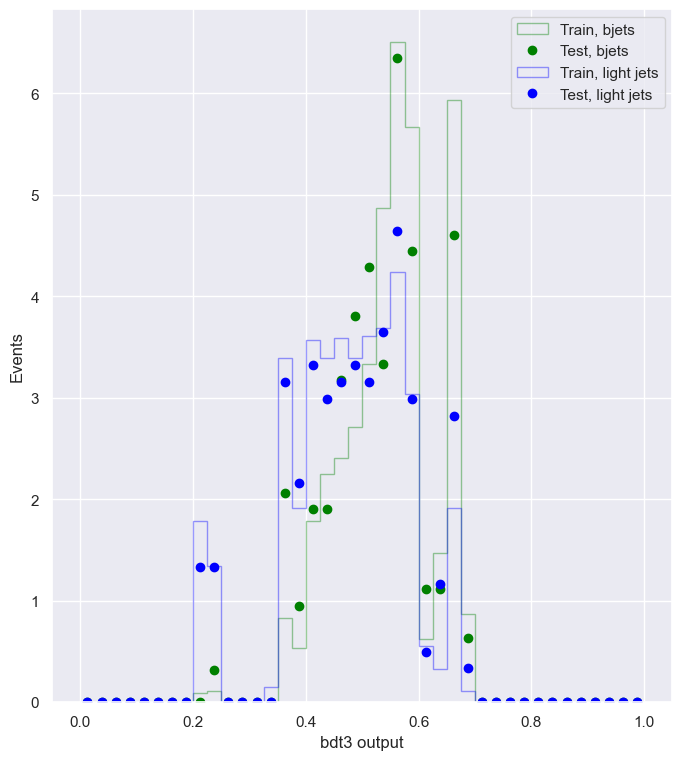

In [85]:
import matplotlib.pyplot as plt

y_pred_b_train = bdt134.predict_proba(X_train[y_train==1])
y_pred_b_test = bdt134.predict_proba(X_test[y_test==1])

y_pred_light_train = bdt134.predict_proba(X_train[y_train==0])
y_pred_light_test = bdt134.predict_proba(X_test[y_test==0])


n_bins=40
hist_range=(0,1.0)
plt.figure(figsize=(8,9))

plt.hist(y_pred_b_train[:,1] ,bins=n_bins,range=hist_range,histtype='step' , color="green",density=True,alpha=0.4,label="Train, bjets")
counts,bin_edges = np.histogram(y_pred_b_test[:,1], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, bjets")

plt.hist(y_pred_light_train[:,1],bins=n_bins,range=hist_range,histtype='step',density=True,alpha=0.4,color="blue",label="Train, light jets")
counts,bin_edges = np.histogram(y_pred_light_test[:,1],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="blue",label="Test, light jets")

plt.xlabel("Prediction from bdt2", fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.legend()
plt.xlabel('bdt3 output')
plt.show()


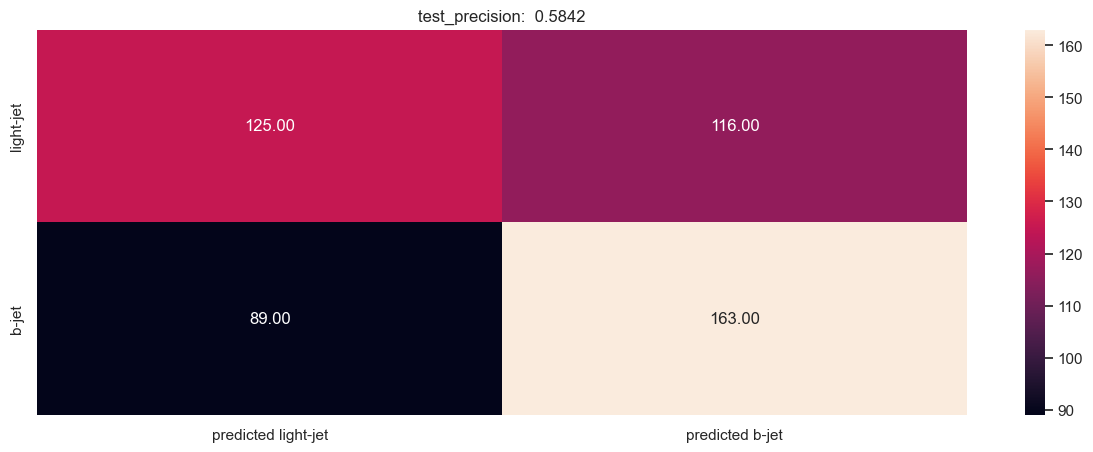

In [86]:
summarize_net(bdt134, X_test, y_test, "test_precision: ")

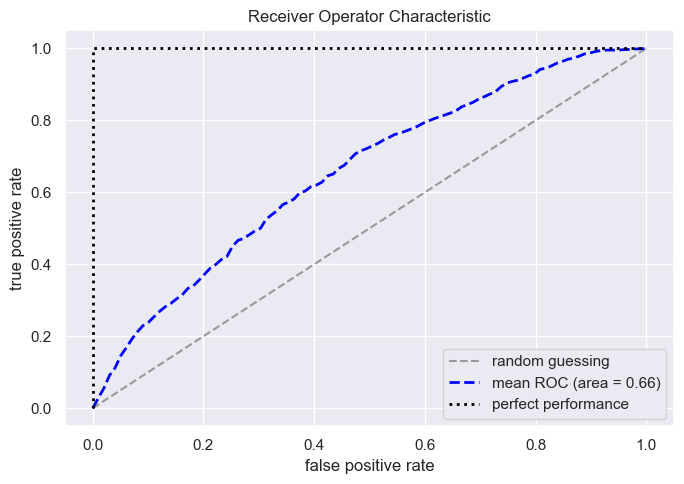

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, precision_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_idx, test_idx) in enumerate(ss.split(y)):
    eval_set = [(x[test_idx], y[test_idx])]
    bdt1 = xgb.XGBClassifier(**best_params, objective='binary:logistic', use_label_encoder=False, early_stopping_rounds=5)
    probas = bdt1.fit(x[train_idx], y[train_idx], eval_set=eval_set, verbose=0).predict_proba(x[test_idx])

    fpr, tpr, thresholds = roc_curve(y[test_idx], probas[:,1], pos_label=1)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    # plt.plot(fpr, tpr, lw=1,
    #             label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1],
        linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
    

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, '--', color='blue',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], [0, 1, 1], lw=2,
         linestyle=':', color='black',
         label='perfect performance')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")


plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()


In [106]:
X_train,X_test,y_train,y_test = train_test_split(bdt_df[['psi_R', 'Emax_frac', 'farthest_eFrac']],bdt_df['is_bjet'],test_size=0.1,random_state=0)
x = X_train.copy().to_numpy()
y = y_train.copy().to_numpy()
x_test = X_test.copy().to_numpy()
y_test = y_test.copy().to_numpy()

In [108]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

# Define the model with L2 regularization
bdt135 = xgb.XGBClassifier(objective='binary:logistic' ,use_label_encoder=False, reg_lambda=1)

# Hyperparameter grid for tuning
param_grid = {
    'eval_metric': ['rmse', 'logloss'],
    'n_estimators': [50, 100, 200, 300, 400, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1, 1.5, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(bdt134, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search.fit(x, y)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the final model with the best parameters
best_params = grid_search.best_params_
best_params['n_estimators'] = 1000  # Increase n_estimators for final training
bdt135 = xgb.XGBClassifier(**best_params, objective='binary:logistic', use_label_encoder=False, early_stopping_rounds=5)


Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


In [ ]:
eval_set = [(x, y), (x_test, y_test)]
bdt135.fit(x, y, eval_set=eval_set, verbose=0)